In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import os, sys
import urllib3
import time
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("."), '..')))
from DataBase.DBUtilities import BRVMDatabase, DataPreProcessor
from Implementation.stock_factorial_analysis import FactorAnalytics

In [ ]:
kl_db = BRVMDatabase("KAN.db")
kl_db.update()

In [2]:
features_cols = ['Momentum_1M','Momentum_3M','Volatility_1W','Volatility_1M','Volume_5d','RelativePrice_1M','PER','Yield','floting_cap']
fact_an = FactorAnalytics()

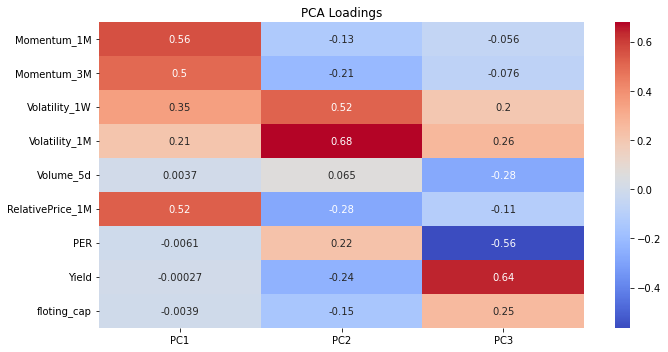

In [3]:
pca_df = fact_an.do_factors_analysis(features_cols)

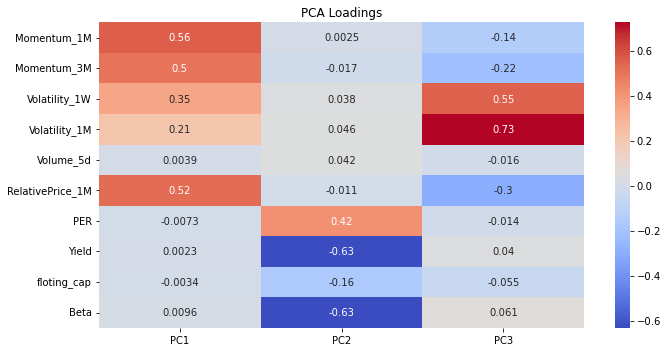

In [4]:
pca_df2 = fact_an.do_factors_analysis(features_cols+["Beta"])

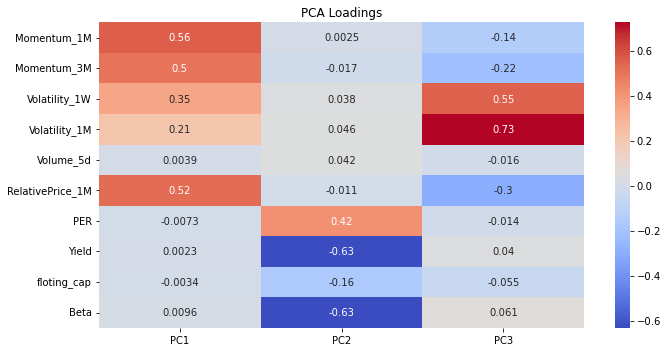

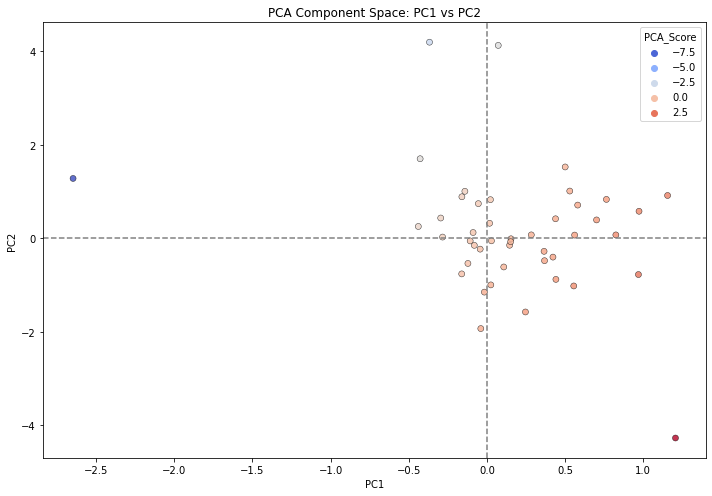

In [5]:
fact_an.plot_pca_scatter()

In [24]:
df.columns

Index(['Ticker', 'Date', 'Description', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Next Earnings Date', 'Market Cap', 'Revenue',
       'Average 3m Volume', 'EPS', 'P/E Ratio', 'Beta', 'Dividend', 'Yield',
       'Daily Trend', 'Weekly Trend', 'Monthly Trend', '1 Day perf',
       '1 Week perf', '1 Month perf', 'YTD', '1 Year perf', '3 Years perf',
       'Momentum_1M', 'Momentum_3M', 'Volatility_1W', 'Volatility_1M',
       'Volume_5d', 'RelativePrice_1M', 'Ret_1M_fwd', 'Ret_3M_fwd'],
      dtype='object')

In [15]:
q = "SELECT * FROM market_cap WHERE Date = (SELECT MAX(Date) FROM market_cap);"
kl_db.execute_query(q)

,Ticker,Date,stock_description,stock_number,floting_cap,globale_cap,globale_cap_pct,trade_number,trade_value,globale_trade_value_pct,PER
0,ABJC,2025-06-16,SERVAIRABIDJANCOTED'IVOIRE,1.091200e+07,4.015579e+09,2.007808e+10,0.17,2790.0,5051890.0,0.39,13.25
1,BICB,2025-06-16,BANQUEINTERNATIONALEPOURL’INDUSTRIEETLECOMMERC...,5.775980e+07,0.000000e+00,3.234549e+11,2.74,433.0,2376440.0,0.18,11.76
2,BICC,2025-06-16,BICICOTED'IVOIRE,1.666667e+07,9.212062e+10,2.816667e+11,2.38,384.0,6527850.0,0.50,10.80
3,BNBC,2025-06-16,BERNABECOTED'IVOIRE,6.624000e+06,2.625346e+09,7.518240e+09,0.06,227.0,261935.0,0.02,1028.00
4,BOAB,2025-06-16,BANKOFAFRICABENIN,4.056105e+07,4.182350e+10,1.837415e+11,1.56,1315.0,5974200.0,0.46,9.41
5,BOABF,2025-06-16,BANKOFAFRICABURKINAFASO,4.400000e+07,2.426691e+10,1.667600e+11,1.41,5613.0,21196045.0,1.64,7.44
6,BOAC,2025-06-16,BANKOFAFRICACOTED'IVOIRE,4.000000e+07,3.342891e+10,2.404000e+11,2.04,8886.0,54312910.0,4.19,7.55
7,BOAM,2025-06-16,BANKOFAFRICAMALI,2.745000e+07,1.025500e+10,8.468325e+10,0.72,8406.0,25945180.0,2.00,9.31
8,BOAN,2025-06-16,BANKOFAFRICANIGER,2.080000e+07,1.424983e+10,5.636800e+10,0.48,1939.0,5454440.0,0.42,11.25
9,BOAS,2025-06-16,BANKOFAFRICASENEGAL,3.600000e+07,2.960151e+10,1.494000e+11,1.26,3714.0,15382360.0,1.19,7.39
